### Preperation

In [1]:
# Import all necessary packagies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold


# Transformers and Encoders
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("./data/BankChurners.csv")

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

The author of the data set suggested that: "PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING."

In [4]:
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
          axis = 1, inplace = True)

### EDA

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.shape

(10127, 21)

In [7]:
# Overview of the datatypes of columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# To check if null value exists
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# Unique Values
columns = df.columns.tolist()
df[columns].nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Visualization

In [11]:
def uni_visualization(df):
    for column in df.columns.values:
        if df[column].dtypes == "object":
            pd.value_counts(df[column]).plot.bar()
            plt.ylabel('Counts')
            plt.show()
        elif df[column].nunique() <= 12:
            df[column].plot.hist(bins = df[column].nunique()) 
            plt.xlabel(column)
            plt.ylabel('count')
            plt.show()
        else:
            df[column].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
            plt.xlabel(column)
            plt.ylabel('count')
            plt.show()               

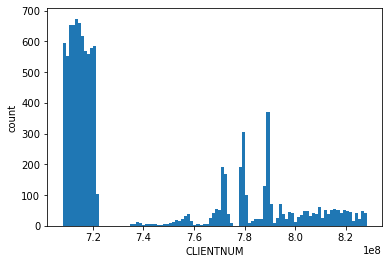

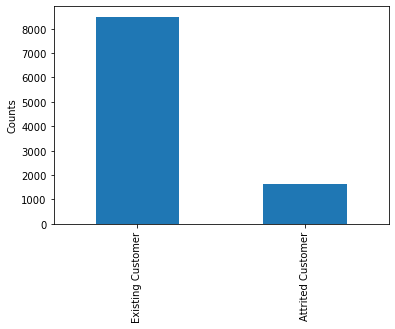

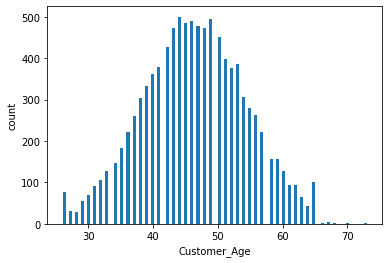

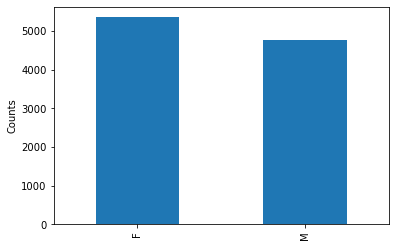

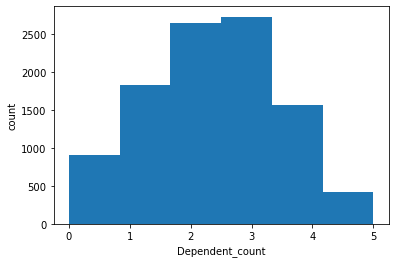

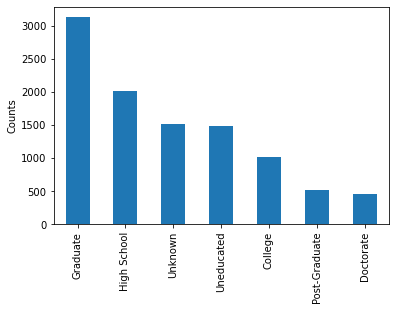

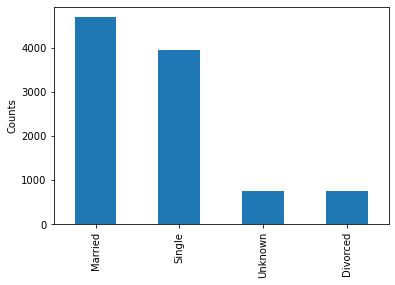

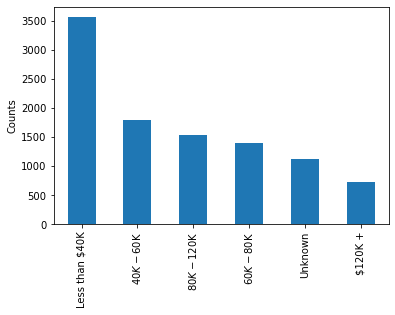

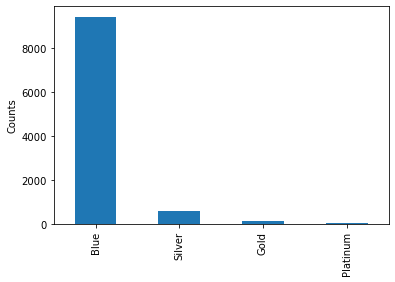

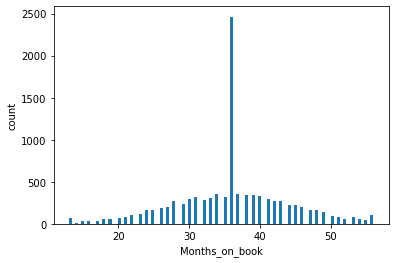

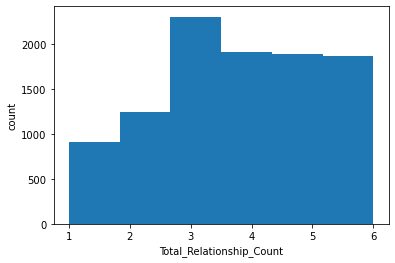

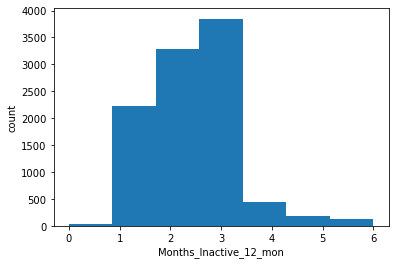

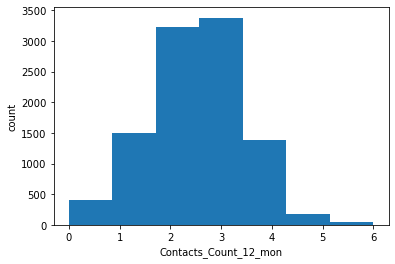

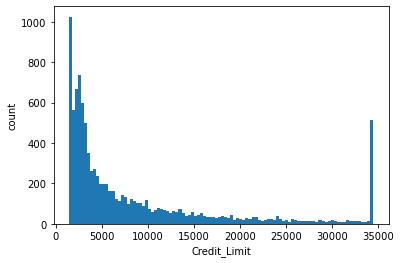

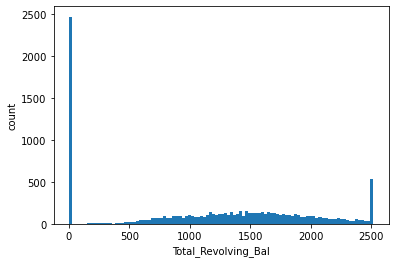

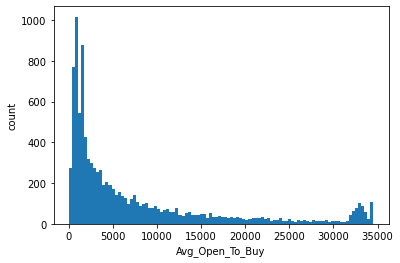

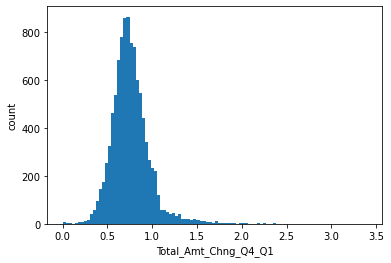

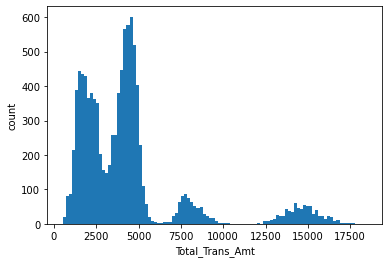

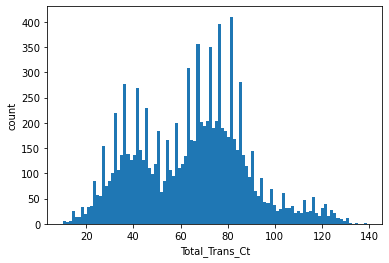

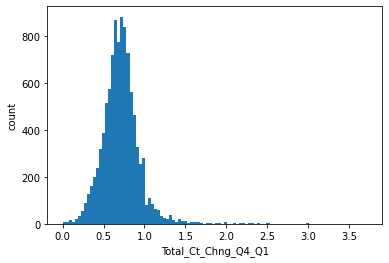

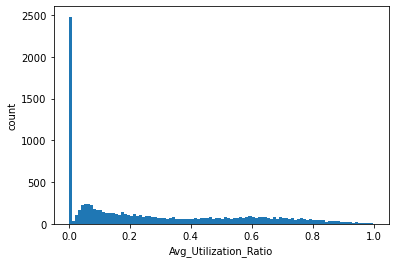

In [12]:
uni_visualization(df)

In [13]:
def visualization(df):
    for column in df.columns.values:
        if df[column].dtypes == "object":
            count_matrix = df.groupby(["Attrition_Flag", column]).size().unstack()
            count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
            count_matrix_norm.plot(kind ='bar', stacked=True)
            plt.ylabel('fraction of people in group')
            plt.title("Proportion of %s for Attrited Customer VS Existing Customer" %column)
            plt.legend(loc = 4)
            plt.show()
        else:
            df[[column, "Attrition_Flag"]].boxplot(by = "Attrition_Flag")
            plt.ylabel(column)
            plt.show()

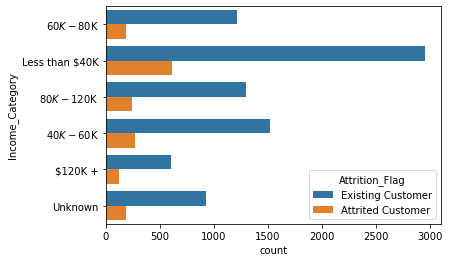

In [14]:
# We don't need to plot the distribution ot the 
ax = sns.countplot(y = "Income_Category", hue = "Attrition_Flag", data=df)

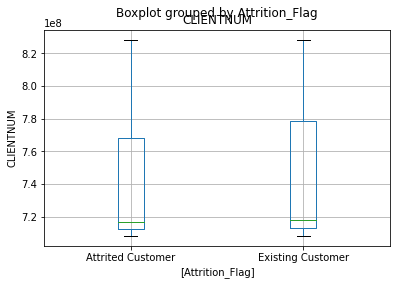

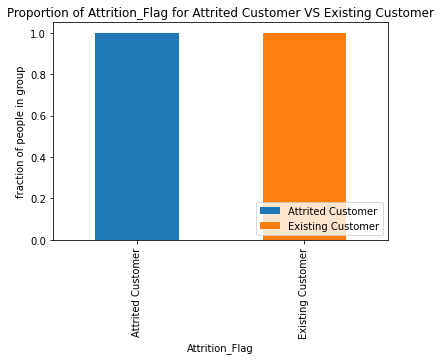

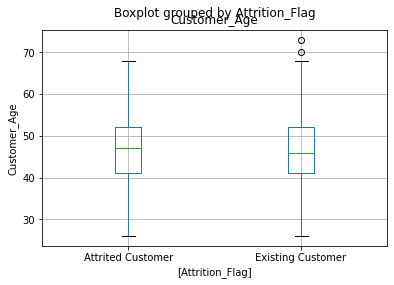

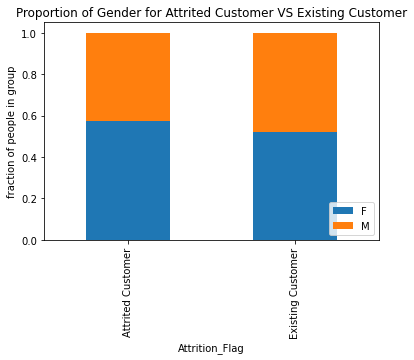

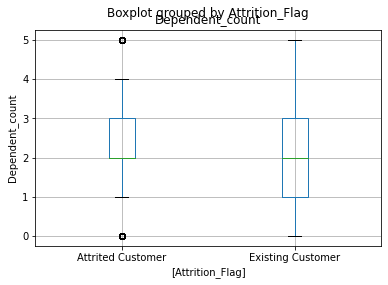

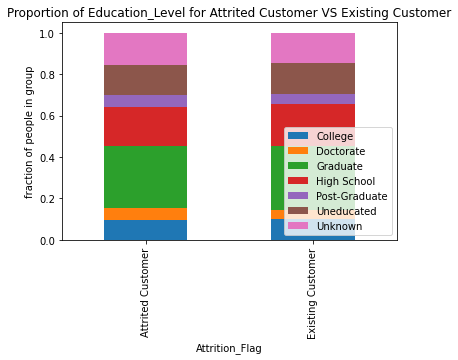

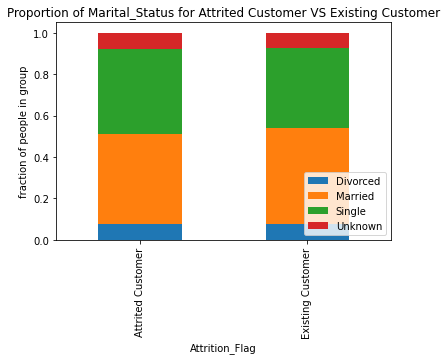

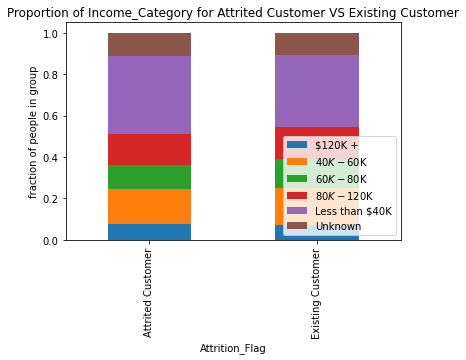

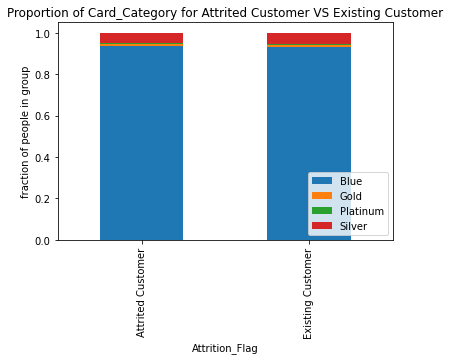

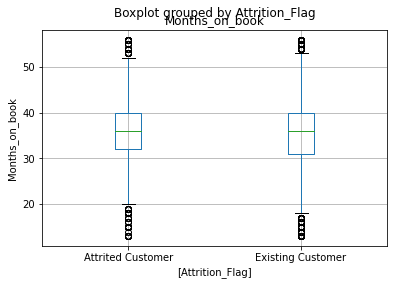

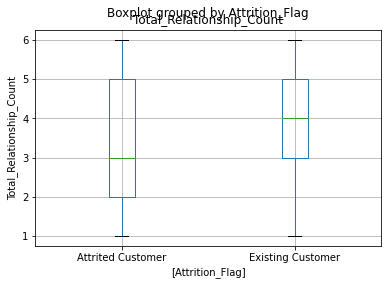

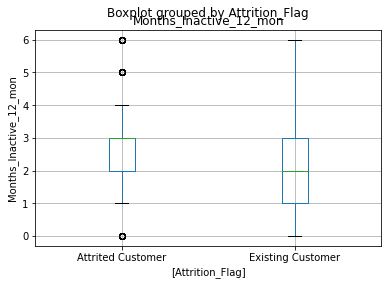

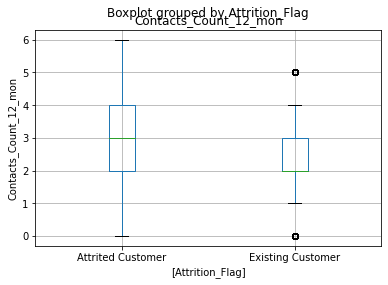

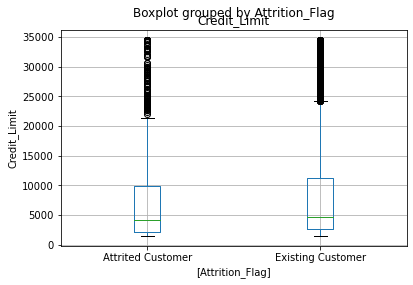

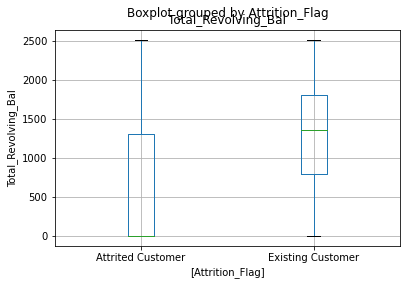

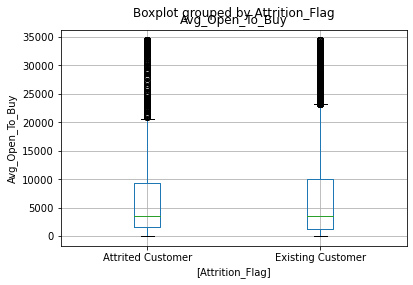

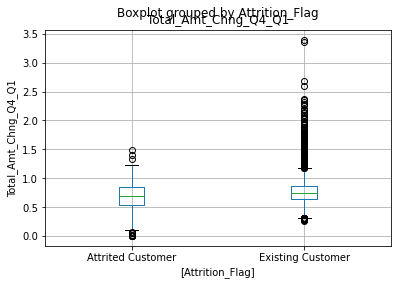

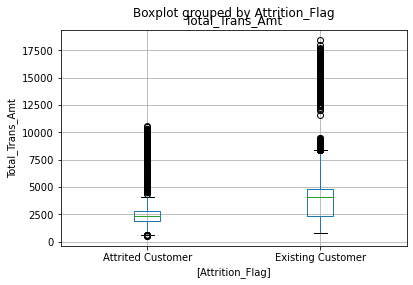

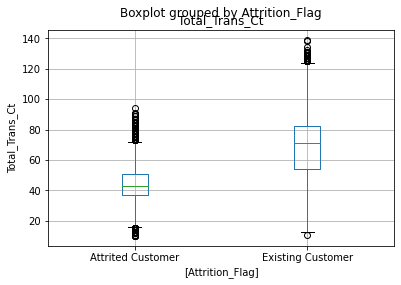

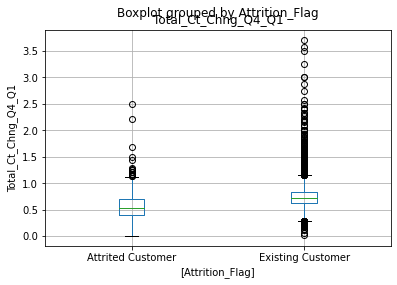

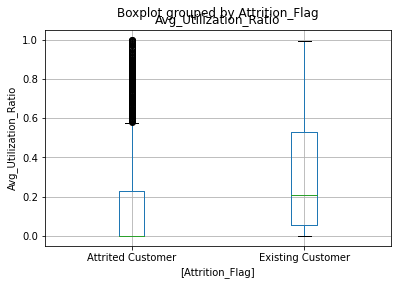

In [15]:
visualization(df)

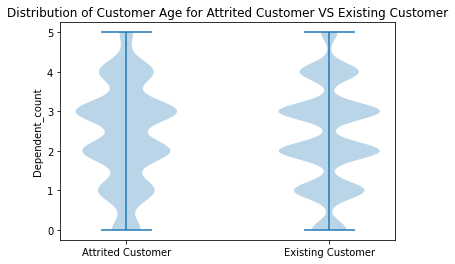

In [16]:
violin_1 = [df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count'].values,
           df[df['Attrition_Flag'] == 'Existing Customer']['Dependent_count'].values]

plt.violinplot(dataset = violin_1)
plt.xticks([1,2],['Attrited Customer','Existing Customer'])
plt.ylabel("Dependent_count")
plt.title("Distribution of Customer Age for Attrited Customer VS Existing Customer")
plt.show()

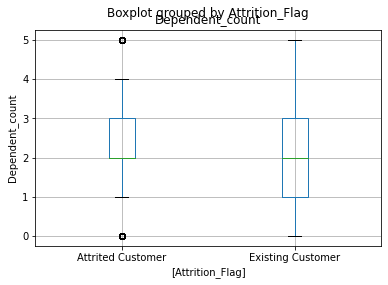

In [17]:
df[["Dependent_count", "Attrition_Flag"]].boxplot(by = "Attrition_Flag")
plt.ylabel("Dependent_count")
plt.show()

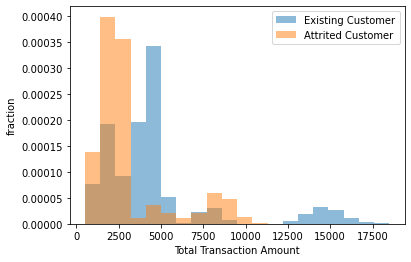

In [18]:
categories = df['Attrition_Flag'].unique()
bin_range = (df['Total_Trans_Amt'].min(),df['Total_Trans_Amt'].max())

for c in categories:
    plt.hist(df[df['Attrition_Flag'] == c]['Total_Trans_Amt'], alpha=0.5, label=c,
             range=bin_range, bins=20, density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Transaction Amount')

plt.show()

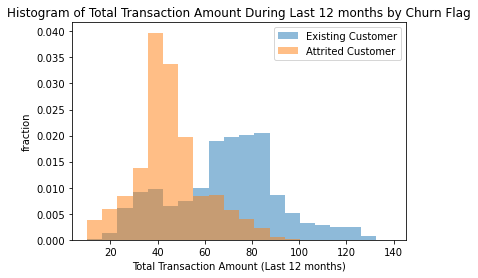

In [19]:
categories = df['Attrition_Flag'].unique()
bin_range = (df['Total_Trans_Ct'].min(),df['Total_Trans_Ct'].max())

for c in categories:
    plt.hist(df[df['Attrition_Flag'] == c]['Total_Trans_Ct'], alpha=0.5, label=c,
             range=bin_range, bins=20, density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Transaction Amount (Last 12 months)')
plt.title("Histogram of Total Transaction Amount During Last 12 months by Churn Flag")

plt.show()

In [20]:
df_num = df.select_dtypes(exclude ='object')

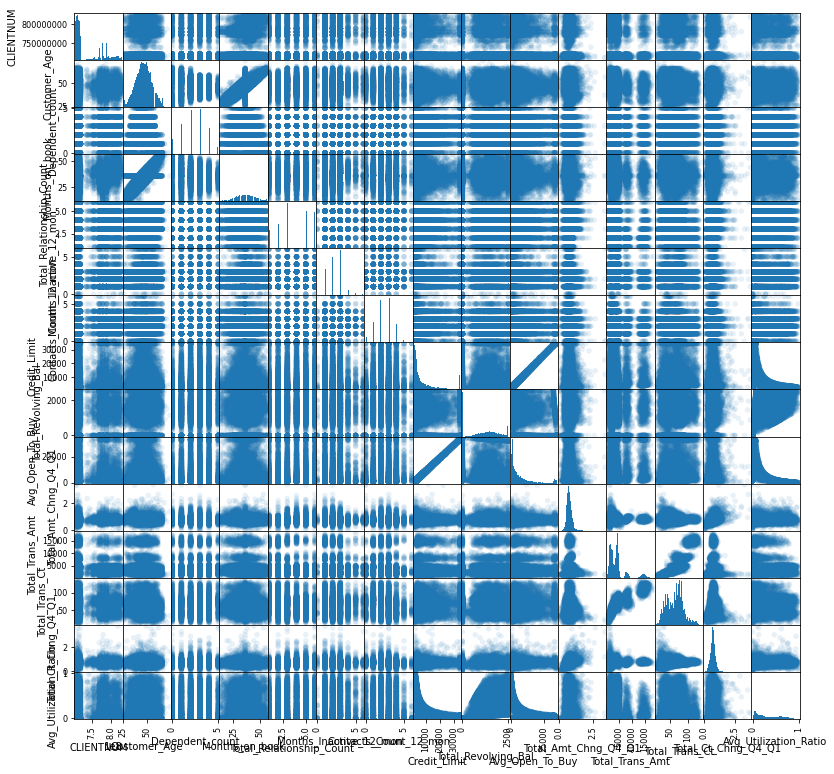

In [21]:
# scatter matrix
pd.plotting.scatter_matrix(df_num, figsize=(13, 13), 
                           marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

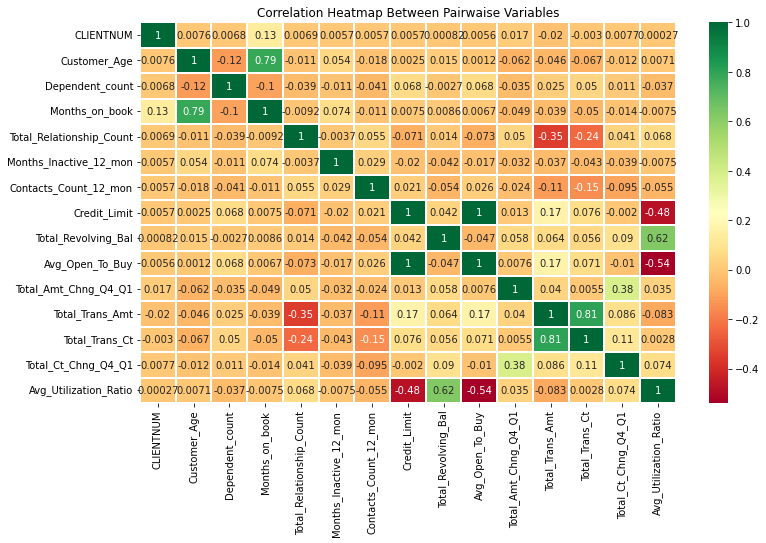

In [22]:
# Correlation Heatmap
corr = df_num.corr()
  
# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (12, 7)) 
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True) 
plt.title("Correlation Heatmap Between Pairwaise Variables")
plt.show()

### Data Preprocessing 

- Drop the redundant column

In [23]:
# No need to have the `CLIENTNUM` in our df
df.drop(["CLIENTNUM"], axis = 1, inplace = True)

In [24]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


- Splitting the data

In [25]:
# Encoding y to 0 or 1
df['Attrition_Flag'] = df['Attrition_Flag'].map({"Attrited Customer":1, "Existing Customer":0})

In [26]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [27]:
y = df['Attrition_Flag'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'Attrition_Flag']

In [28]:
# Stratified splits
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.7,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 2/3,stratify=y_other,random_state=random_state)
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.839306
1    0.160694
Name: Attrition_Flag, dtype: float64
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64


- Encoding

In [29]:
df.columns.values

array(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'], dtype=object)

In [30]:
df[(df['Income_Category'] == "Unknown") & (df['Education_Level'] == "Unknown")]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
94,0,45,F,3,Unknown,Married,Unknown,Blue,28,5,1,2,2535.0,2440,95.0,1.705,1312,20,1.222,0.963
101,0,41,F,3,Unknown,Married,Unknown,Silver,34,5,3,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059
432,0,67,F,0,Unknown,Married,Unknown,Blue,56,4,3,3,10509.0,2388,8121.0,0.777,1365,34,1.429,0.227
498,0,44,M,1,Unknown,Married,Unknown,Blue,34,6,2,0,2885.0,1895,990.0,0.387,1366,31,0.632,0.657
547,0,61,F,1,Unknown,Married,Unknown,Blue,47,4,2,3,1438.3,0,1438.3,1.337,1449,27,1.455,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1,41,F,4,Unknown,Single,Unknown,Blue,25,2,2,3,29295.0,0,29295.0,1.411,9865,65,0.711,0.000
9792,0,59,F,2,Unknown,Single,Unknown,Blue,46,2,3,2,23731.0,1890,21841.0,0.677,13647,93,0.576,0.080
9893,0,42,F,3,Unknown,Unknown,Unknown,Blue,36,6,1,2,15648.0,0,15648.0,0.731,13784,88,0.913,0.000
9951,1,44,F,3,Unknown,Single,Unknown,Blue,34,2,3,3,26021.0,0,26021.0,1.040,8898,60,0.538,0.000


In [31]:
onehot_ftrs = ['Gender', 'Marital_Status']
minmax_ftrs = ['Customer_Age', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
ordinal_ftrs = ['Income_Category', 'Education_Level', 'Card_Category']
ordinal_cats = [['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
                ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
                ['Blue', 'Silver', 'Gold', 'Platinum']]
std_ftrs = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 
            'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [32]:
# Collect all the encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

In [33]:
X_train_prep.shape

(7088, 23)

In [34]:
X_val_prep.shape

(2026, 23)

In [35]:
X_test_prep.shape

(1013, 23)